In [3]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample
from sklearn.inspection import permutation_importance
import numpy as np

sns.set(style="whitegrid")

In [4]:
# Carrega o conjunto de dados Titanic diretamente de um repositório no GitHub
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Seleciona apenas as colunas 'Sex', 'Pclass' e 'Survived', e remove linhas com valores ausentes (NaN)
df = df[['Sex', 'Pclass', 'Survived']].dropna()

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Sexo'] = df['Sex'].map({0: 'Homem', 1: 'Mulher'})
df['Classe'] = df['Pclass'].astype(str)
df['Sobreviveu'] = df['Survived'].map({0: 'Não', 1: 'Sim'})

C:\Users\jmarques\AppData\Local\Temp\ipykernel_7708\3978351522.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set2')


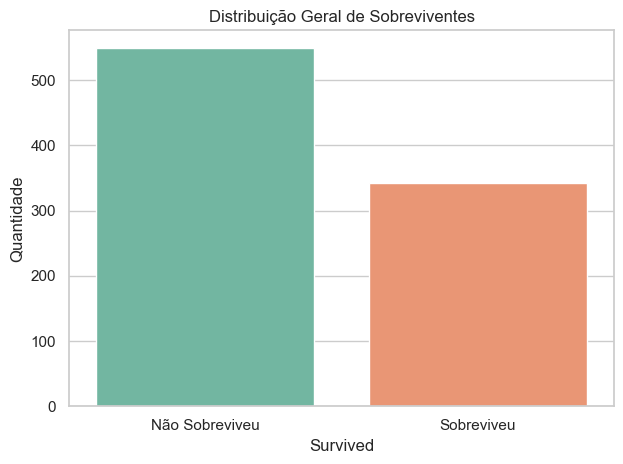

In [8]:
# plot da distribuição geral de sobreviventes
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title("Distribuição Geral de Sobreviventes")
plt.xticks([0, 1], ['Não Sobreviveu', 'Sobreviveu'])
plt.ylabel("Quantidade")
plt.tight_layout()
plt.show()

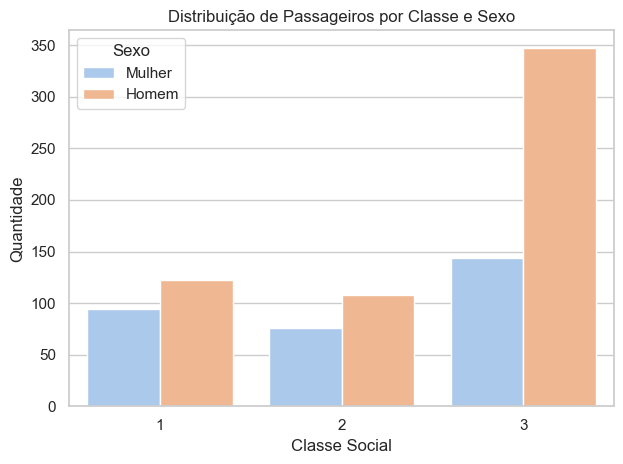

In [6]:
# plot da distribuição por classe e sexo
sns.countplot(x='Pclass', hue='Sexo', data=df, palette='pastel')
plt.title("Distribuição de Passageiros por Classe e Sexo")
plt.xlabel("Classe Social")
plt.ylabel("Quantidade")
plt.tight_layout()
plt.show()

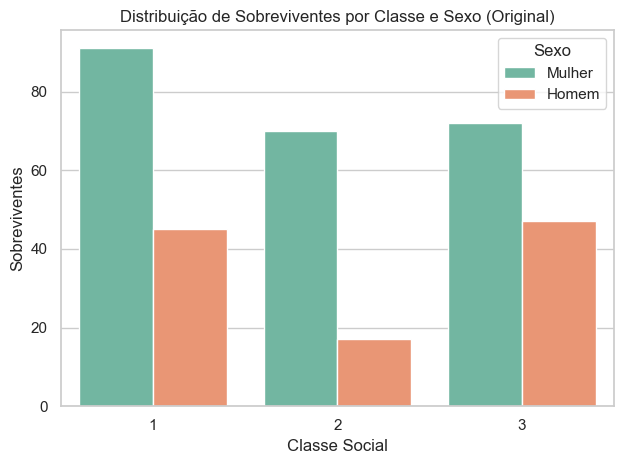

In [9]:
# Sobreviventes por classe e sexo
sobreviventes = df[df['Survived'] == 1]
sns.countplot(x='Pclass', hue='Sexo', data=sobreviventes, palette='Set2')
plt.title("Distribuição de Sobreviventes por Classe e Sexo (Original)")
plt.xlabel("Classe Social")
plt.ylabel("Sobreviventes")
plt.tight_layout()
plt.show()

C:\Users\jmarques\AppData\Local\Temp\ipykernel_7708\2932129216.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=proporcao, palette='Blues_d')


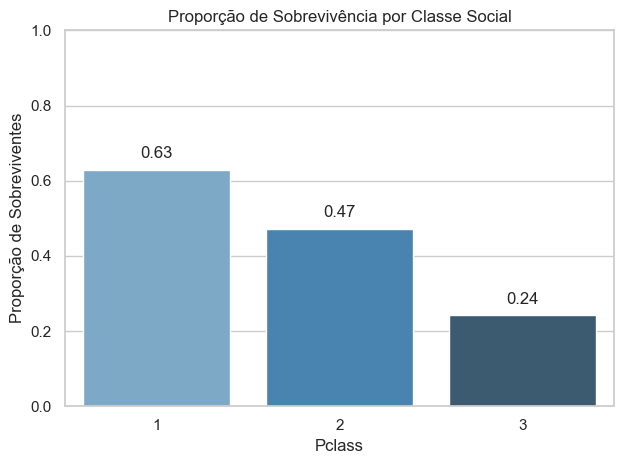

In [10]:
# Proporção de sobreviventes por classe
proporcao = df.groupby('Pclass')['Survived'].mean().reset_index()
sns.barplot(x='Pclass', y='Survived', data=proporcao, palette='Blues_d')
plt.title("Proporção de Sobrevivência por Classe Social")
plt.ylabel("Proporção de Sobreviventes")
plt.ylim(0, 1)
for i, val in enumerate(proporcao['Survived']):
    plt.text(i, val + 0.03, f"{val:.2f}", ha='center')
plt.tight_layout()
plt.show()

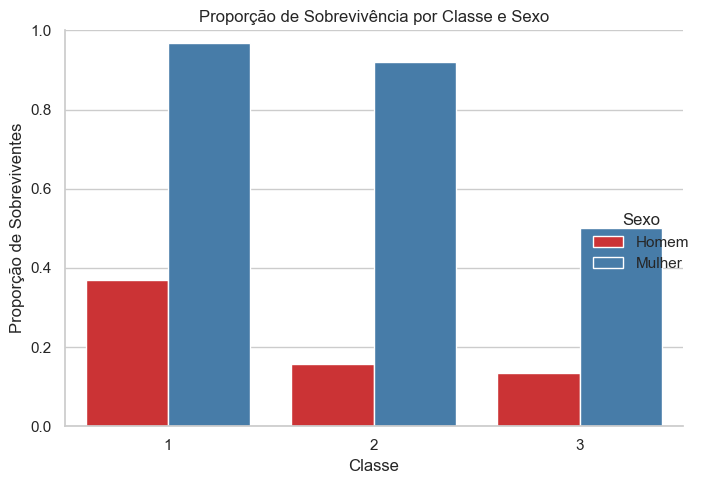

In [11]:
# Proporção de sobreviventes por classe e sexo
proporcao_sexo_classe = df.groupby(['Classe', 'Sexo'])['Survived'].mean().reset_index()
sns.catplot(data=proporcao_sexo_classe, x='Classe', y='Survived', hue='Sexo', kind='bar', palette='Set1', height=5, aspect=1.2)
plt.title("Proporção de Sobrevivência por Classe e Sexo")
plt.ylim(0, 1)
plt.ylabel("Proporção de Sobreviventes")
plt.tight_layout()
plt.show()